In [3]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns 

ModuleNotFoundError: No module named 'seaborn'

In [7]:
X = np.array([35,45,190,200,40,70,54,150,120,110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [8]:
y = np.array([401,574,874,919,459,739,653,902,746,832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

### Найдем коэффициент регрессии b. Его можно найти 2 способами:

In [13]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)
b

2.620538882402765

In [14]:
n = 10

In [15]:
b = (n*(np.sum(X*y)) - (np.sum(X)*np.sum(y)))/(n*(np.sum(X**2))-((np.sum(X)**2)))
b

2.6205388824027653

### Haходим интерсепт:

In [16]:
a = np.mean(y)-b*np.mean(X)
a

444.17735732435955

In [18]:
y_hat = a + b*X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [19]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

### Строим график с интерсептом:

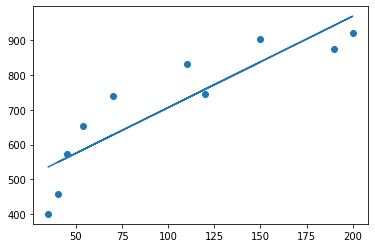

In [22]:
%matplotlib inline
plt.scatter (X,y)
plt.plot (X, a + b*X)
plt.show()

### Решим уравнение матричным методом без интерсепта:

In [25]:
X = X.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [27]:
y = y.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [28]:
X = np.hstack([np.ones((10,1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [30]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[444.17735732],
       [  2.62053888]])

### Воспользуемся методом градиентного спуска:

In [52]:
B1 = 0.1

In [53]:
n = 10

In [54]:
alpha = 1e-6

In [55]:
for i in range (10):
    B1-=alpha*(2/n)*np.sum((B1*X-y)*X)
    print('B1= {}'.format(B1))

B1= 0.26094768
B1= 0.417460414488064
B1= 0.5696604092747625
B1= 0.7176665027651146
B1= 0.8615942587481212
B1= 1.001556056629465
B1= 1.1376611791778286
B1= 1.2700158978533478
B1= 1.3987235557848192
B1= 1.5238846484604573


In [56]:
for i in range (1000):
    B1-=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%100==0:   
        print('Iteration:{i},B1= {B1},mse={mse}'.format(i=i,B1=B1,mse=mse_(B1)))

Iteration:0,B1= 1.6455969021951997,mse=836773.912713573
Iteration:100,B1= 5.678199564154357,mse=583531.0554298281
Iteration:200,B1= 5.924849647531717,mse=582583.6652620613
Iteration:300,B1= 5.939935751651014,mse=582580.1210431262
Iteration:400,B1= 5.9408584780267,mse=582580.1077840821
Iteration:500,B1= 5.9409149156568315,mse=582580.1077344796
Iteration:600,B1= 5.9409183676076776,mse=582580.107734294
Iteration:700,B1= 5.940918578742781,mse=582580.1077342934
Iteration:800,B1= 5.940918591656646,mse=582580.1077342933
Iteration:900,B1= 5.940918592446509,mse=582580.1077342932


In [58]:
def mse_(B1,y=y,X=X,n=10):
    return np.sum((B1*X-y)**2)/n

In [59]:
mse_(B1)

582580.1077342933

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1